In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pmdarima.arima import ADFTest
import numpy as np
import seaborn as sns

# Modelado del flujo migratorio con base en las migraciones netas

In [112]:
#Importamos las bases de datos
inf = pd.read_excel('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Inflación.xls')
mig_net = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Migraciones_netas.csv')
pib = pd.read_excel('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Pib.xls')
Heat_map = pd.read_excel('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Libro1.xlsx')
Tabla_final = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/tabla_general.csv')

In [113]:
# elegimos los países a estudio y transponemos la gráfica
pib

,Date,Bahamas,Belice,Bolivia,Brasil,Canada,Chile,Colombia,Costa Rica,Republica Dominicana,...,Honduras,Haiti,Jamaica,Mexico,Peru,Paraguay,El Salvador,Uruguay,Estados Unidos,America_latina
0,1981,6257.786590,1318.127065,1004.880903,2061.349954,12337.466249,2965.374260,1358.485452,1057.417935,1284.789552,...,1038.031037,256.831494,1374.957556,3812.580776,1208.125831,1778.053821,755.565946,3724.899679,13976.105393,8.944109e+11
1,1982,6797.830965,1195.508972,933.735307,2118.564108,12481.874787,2144.915565,1421.921688,1021.891835,1374.468639,...,1062.469765,250.813075,1497.328744,2612.759171,1185.401477,1666.650808,738.969574,3080.980673,14433.787727,8.291427e+11
2,1983,7324.186554,1231.012451,885.965191,1448.009731,13425.122489,1699.656589,1381.120048,1199.897696,1499.964293,...,1081.906930,270.702010,1620.979621,2166.461251,920.529713,1696.913066,747.673146,1704.575828,15543.893717,7.263349e+11
3,1984,8463.464999,1342.227691,986.812952,1406.689800,13877.917076,1615.320908,1333.370911,1357.642778,1845.560023,...,1153.309541,296.768003,1048.351309,2507.312061,911.789224,1309.658013,765.687100,1612.310606,17121.225485,7.264991e+11
4,1985,9436.232744,1301.082642,842.090233,1287.612405,14114.807760,1436.176916,1189.869126,1414.128192,786.031742,...,1202.937560,321.733641,916.315733,2607.380251,838.059141,928.426274,779.281929,1564.707926,18236.827727,7.227277e+11
5,1986,9858.295721,1385.471231,607.082140,1545.928425,14461.069239,1509.532606,1166.300797,1551.691775,934.069964,...,1257.389759,363.602311,1189.429885,1765.184878,754.349926,1024.193149,758.765652,1933.481231,19071.227195,7.229043e+11
6,1987,10617.405269,1643.949927,652.705759,1667.187570,16308.966966,1750.632095,1188.551777,1549.941803,870.645582,...,1332.517655,314.549819,1406.953274,1902.438068,1001.496679,1062.046435,781.111028,2408.632599,20038.941099,7.617675e+11
7,1988,10819.268042,1831.019639,675.715310,1781.817876,18936.964102,2015.749007,1254.531546,1537.461223,786.384569,...,1235.365479,393.369891,1625.744270,2302.027017,730.209763,1106.971847,810.352697,2668.666647,21417.011931,8.510430e+11
8,1989,11533.260764,2065.720309,678.642159,2344.730687,20715.631483,2276.376909,1238.603367,1705.431654,957.960093,...,1105.556187,403.328252,1856.001946,2759.445651,1040.475190,1204.096538,829.512515,2724.097434,22857.154433,9.286034e+11
9,1990,11696.511366,3009.491262,685.942718,2592.627166,21448.361960,2481.766875,1467.547436,1808.495959,992.238964,...,974.229484,447.096290,1919.802037,3196.918925,1194.548302,1431.839200,897.592982,2983.254365,23888.600009,1.107820e+12


## Primer modelo

Se utilizará un modelo de regresión lineal multiple entrenado con el PIB y la Inflación bajo los periodos de 1981 a 2021.

In [114]:
paises_X = pd.merge(inf, pib, on='Date',suffixes=('_inf','_pib'),how='outer')

In [115]:
Latam_Y = mig_net[['Date','America_Latina']]
Latam_Y = Latam_Y.set_index('Date')
Latam_X=paises_X[['Date','America_latina_inf','America_latina_pib']]
Latam_X=Latam_X.set_index('Date')

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(Latam_X,Latam_Y,test_size=0.2,random_state=7,shuffle=False)

In [117]:
lr = LinearRegression()

In [128]:
lr.fit(X_train, Y_train)

LinearRegression()

In [119]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[1.67854828e+04 6.89374954e-08]]
Valor de la intersección o coeficiente "b":
[-1108288.57530527]


In [131]:

print('Precisión del modelo:')
print(lr.score(X_train,Y_train))

Precisión del modelo:
0.37062962122535514


Obtenemos un modelo con una presición del 37%. No es aceptable, por lo que pasaremos a entrenar un modelo autorregresivo

## Segundo modelo

En la segunda parte proponemos un modelo ARIMA de corte estadístico

### Datos

In [179]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [224]:
#obtenemos nuestras series de tiempo
Latam_mig = mig_net[['Date','America_Latina']]


In [225]:
#Convertimos a formato de fecha
Latam_mig['Date'] = pd.to_datetime(Latam_mig['Date'],format='%Y')
Latam_mig = Latam_mig.set_index('Date')

In [226]:
#Verificamos que no existan valores nulos
print(f"Valores missing: {Latam_mig.isnull().any(axis=1).sum()}")

Valores missing: 0


### Prueba Dickey-Fuller-Aumentada

Una prueba de Dickey-Fuller aumentada (ADF) es un tipo de prueba estadística que determina si una raíz unitaria está presente en los datos de series de tiempo. Las raíces unitarias pueden causar resultados impredecibles en el análisis de series de tiempo. Se forma una hipótesis nula en la prueba de raíz unitaria para determinar qué tan fuertemente los datos de series temporales se ven afectados por una tendencia. Al aceptar la hipótesis nula, aceptamos la evidencia de que los datos de la serie temporal no son estacionarios. Al rechazar la hipótesis nula o aceptar la hipótesis alternativa, aceptamos la evidencia de que los datos de la serie de tiempo son generados por un proceso estacionario. Este proceso también se conoce como tendencia estacionaria. Los valores de la estadística de prueba ADF son negativos. Los valores más bajos de ADF indican un rechazo más fuerte de la hipótesis nula.

In [180]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [181]:
Prueba_Dickey_Fuller(Latam_mig['America_Latina'],"America_Latina")

Resultados de la prueba de Dickey-Fuller para columna: America_Latina
Test Statistic                        -1.678385
p-value                                0.442282
No Lags Used                           8.000000
Número de observaciones utilizadas    32.000000
Critical Value (1%)                   -3.653520
Critical Value (5%)                   -2.957219
Critical Value (10%)                  -2.617588
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


Podemos observar en el resultado que obtuvismo que la serie no estacionaria, debido a que el p-value es mayor que 5%.

Uno de los objetivo de aplicar la prueba ADF es conocer si nuestra series es estacionaria, al conocer el resultado de la prueba ADF, entonces podemos determinar el siguiente paso. Para nuestro caso, se puede ver en el resultado anterior que la serie no es estacionaria, por lo que procederemos al siguiente paso, que es diferenciar nuestra serie.

In [185]:
df1=Latam_mig.copy()
# Take first difference
df1['Migraciones_diff'] = Latam_mig['America_Latina'].diff()

df1['Migraciones_diff2'] = df1['Migraciones_diff'].diff()

# Remove the first data point
df1.dropna(inplace=True)

# Take a look at the head of the dataset
df1.head()

,America_Latina,Migraciones_diff,Migraciones_diff2
Date,,,
1983-01-01,-739636,49676.0,-9493.0
1984-01-01,-817723,-78087.0,-127763.0
1985-01-01,-867237,-49514.0,28573.0
1986-01-01,-973441,-106204.0,-56690.0
1987-01-01,-955756,17685.0,123889.0


In [188]:
Prueba_Dickey_Fuller(df1['Migraciones_diff2'],"Migraciones_diff2")

Resultados de la prueba de Dickey-Fuller para columna: Migraciones_diff2
Test Statistic                       -5.921140e+00
p-value                               2.504866e-07
No Lags Used                          5.000000e+00
Número de observaciones utilizadas    3.300000e+01
Critical Value (1%)                  -3.646135e+00
Critical Value (5%)                  -2.954127e+00
Critical Value (10%)                 -2.615968e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


### División para entrenamiento y prueba

In [235]:
train_mig = Latam_mig[:len(Latam_mig)-1]
test_mig = Latam_mig[len(Latam_mig)-12:]
test=test_mig.copy()

In [236]:
train_mig.shape, test_mig.shape

((40, 1), (12, 1))

In [238]:
plot_train = train_mig.hvplot.line(label='train')
plot_test = test_mig.hvplot.line(label='test')

layout = plot_train * plot_test
layout = layout.opts(title='Migración neta', ylabel='Tasa migratoria')
layout

:Overlay
   .Curve.Train :Curve   [Date]   (America_Latina)
   .Curve.Test  :Curve   [Date]   (America_Latina)

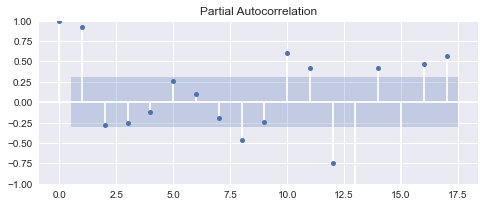

In [239]:
# Gráfico autocorrelación parcial

fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(Latam_mig['America_Latina'], ax=ax)
plt.show()

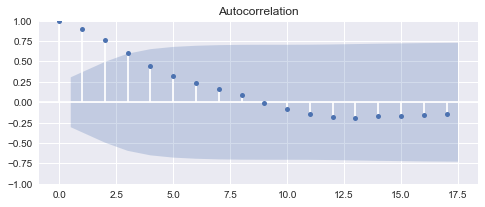

In [240]:
# Gráfico autocorrelación

fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(Latam_mig['America_Latina'], ax=ax)
plt.show()

### Modelo Autoarima

Ejecutemos la función auto_arima() para obtener los mejores parametros de p,d,q,P,D,Q



In [193]:
# Modelo Auto-Arima
from pmdarima import auto_arima 

**Nota:** El parámetro 
 se refiere al número de periodo para cada estacionalidad

* 7 para los días
* 12 para los meses
* 52 para las semanas
* 4 Trimestral
* 1 Anual

In [243]:
modelo_auto=auto_arima(train_mig,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=1, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=10)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1044.242, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1046.091, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1046.168, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1043.639, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.109 seconds
 ARIMA(0,1,0)(0,0,0)[0]          


Como podemos ver, el mejor modelo de arima elegido por auto_arima() es ARIMA(0,1,0)(0,0,0)[0]. Por lo regular cuando el modelo dicho por auto_arima no pasa el DFA test se trata de datos con overfit, es decir, predecirá el mismo dato hasta que se acerque más a la media, lo cuál no nos sirve, por lo que utilizaremos un modelo parecido al propuesto por auto_arima, pero con segunda diferencia.

In [244]:
print(modelo_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -520.820
Date:                Tue, 28 Feb 2023   AIC                           1043.639
Time:                        03:41:24   BIC                           1045.303
Sample:                    01-01-1981   HQIC                          1044.236
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.269e+10   3.59e+09      6.327      0.000    1.57e+10    2.97e+10
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.42   Pr

### Implementación del modelo

In [245]:
arima_model = SARIMAX(train_mig["America_Latina"], order = (0,2,0), seasonal_order = (0,0,0,0)) 
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         America_Latina   No. Observations:                   40
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -517.747
Date:                Tue, 28 Feb 2023   AIC                           1037.494
Time:                        03:41:27   BIC                           1039.131
Sample:                    01-01-1981   HQIC                          1038.076
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.794e+10   5.09e+09      7.452      0.000     2.8e+10    4.79e+10
===================================================================================
Ljung-Box (L1) (Q):                   9.91   Jarque-Bera (JB):                25.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.92   Skew:                            -1.20
Prob(H) (two-sided):                  0.25   Kurtosis:                         6.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

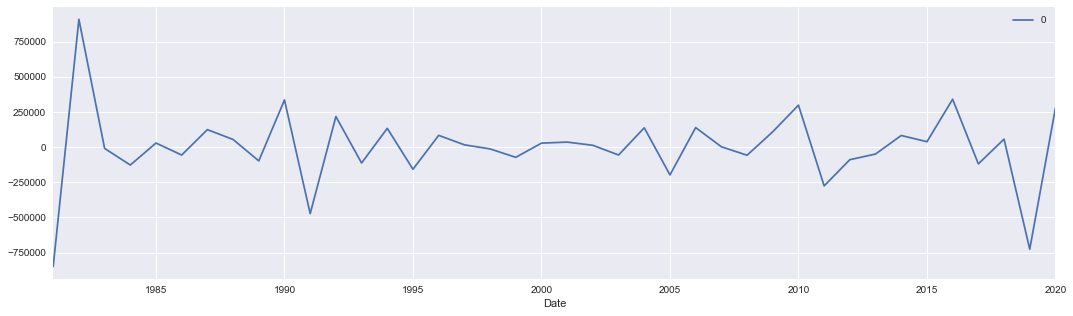

In [246]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

### Interpretación

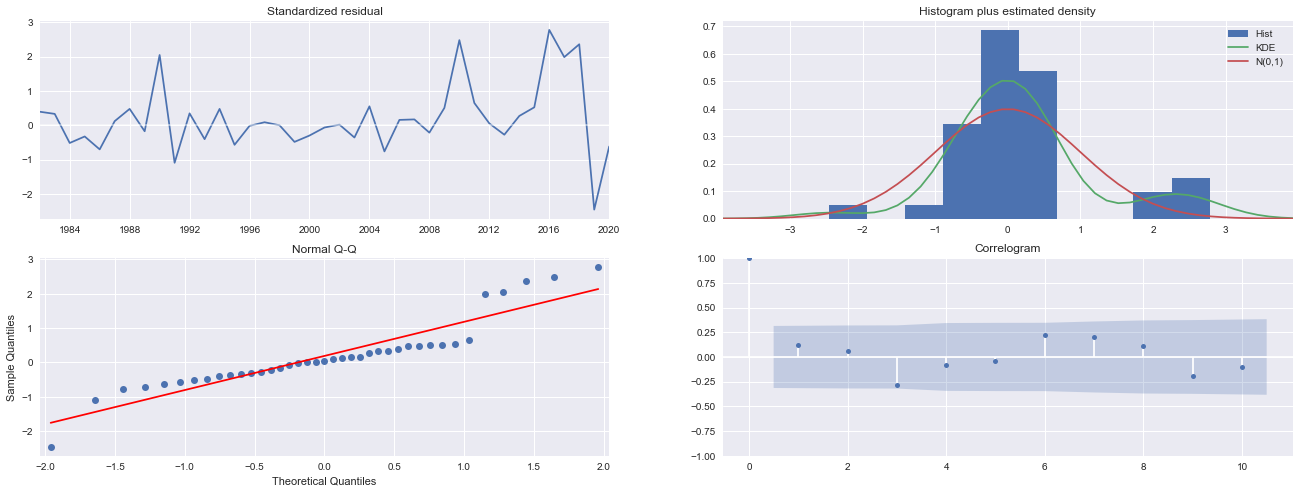

In [247]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()


Arriba a la izquierda: los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme a excepción de un año atípico.

Arriba a la derecha: la gráfica de densidad sugiere una distribución normal con media cero.

Abajo a la izquierda: todos los puntos deben estar perfectamente alineados con la línea roja. La desviación del último punto indica sesgo en la distribución. Dado el caso de los datos presentados, es útil dejar este sesgo para pronosticar años con tendencia atípica disruptiva, tal como fue el 2020.

Abajo a la derecha: el correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. Cualquier autocorrelación implicaría que existe algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, deberá buscar más X (predictores) en el modelo.

En general, parece encajar bien. Pronostiquemos.

### Predicciones

In [257]:
arima_pred2 = arima_result.predict(start='1990-01-01',end='2024-01-01', typ="levels").rename("ARIMA Predictions")
arima_pred2

1990-01-01    -937399.0
1991-01-01    -294164.0
1992-01-01    -932573.0
1993-01-01    -663548.0
1994-01-01    -838196.0
1995-01-01    -633779.0
1996-01-01    -877498.0
1997-01-01    -797236.0
1998-01-01    -768347.0
1999-01-01    -781839.0
2000-01-01    -928221.0
2001-01-01    -945792.0
2002-01-01    -920638.0
2003-01-01    -905661.0
2004-01-01   -1016281.0
2005-01-01    -796607.0
2006-01-01   -1109599.0
2007-01-01    -948008.0
2008-01-01    -920422.0
2009-01-01   -1011247.0
2010-01-01    -826542.0
2011-01-01    -155448.0
2012-01-01    -333833.0
2013-01-01    -415628.0
2014-01-01    -506983.0
2015-01-01    -384080.0
2016-01-01    -267496.0
2017-01-01     490817.0
2018-01-01     670324.0
2019-01-01    1082046.0
2020-01-01     -14628.0
2021-01-01     169196.0
2022-01-01      75777.0
2023-01-01     -17642.0
2024-01-01    -111061.0
Freq: AS-JAN, Name: ARIMA Predictions, dtype: float64

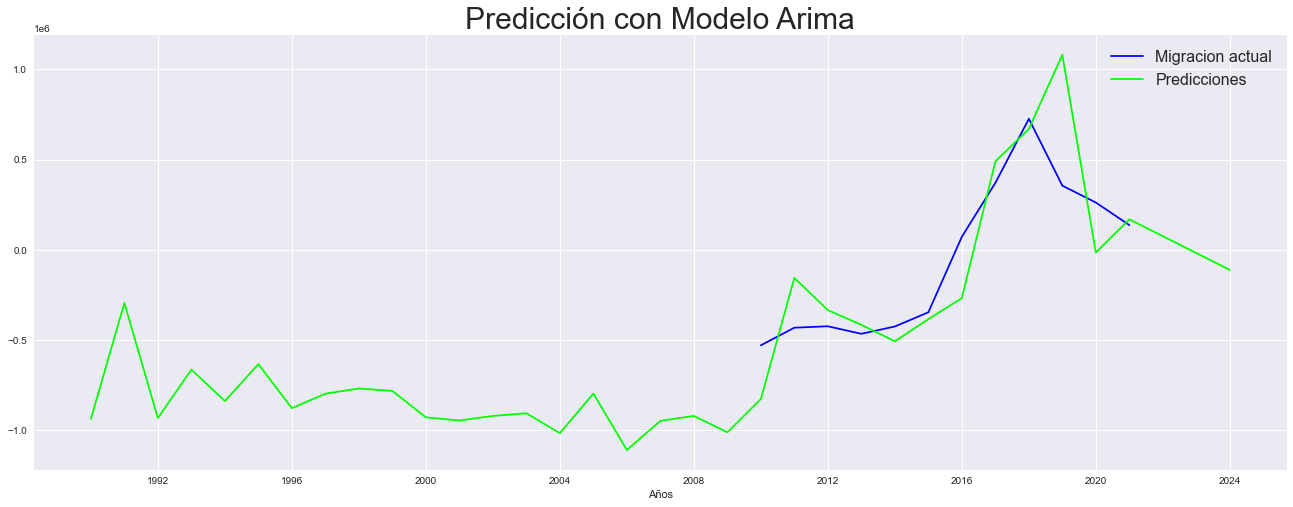

In [258]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_mig["America_Latina"],color="blue" ,label="Migracion actual")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Años')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

In [265]:
arima_pred = arima_result.predict(start='2010-01-01',end='2021-01-01', typ="levels").rename("ARIMA Predictions")
arima_pred

2010-01-01    -826542.0
2011-01-01    -155448.0
2012-01-01    -333833.0
2013-01-01    -415628.0
2014-01-01    -506983.0
2015-01-01    -384080.0
2016-01-01    -267496.0
2017-01-01     490817.0
2018-01-01     670324.0
2019-01-01    1082046.0
2020-01-01     -14628.0
2021-01-01     169196.0
Freq: AS-JAN, Name: ARIMA Predictions, dtype: float64

In [259]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [266]:
evaluacion_metrica(test_mig,arima_pred)

Evaluation metric results:-
MSE is : 76779755632.41669
MAE is : 198674.41666666672
RMSE is : 277091.60151909455
MAPE is : 192.56920768481035
R2 is : 0.5410593347835546



Lo que tenemos aquí es un modelo sesgado por los outliers presentados en los últimos años, pero funcional con un R2 de 0.54 y cumple con los test pertinentes. Una posible solución a este sesgo es encontrar datos mensuales de migración.

In [267]:
#Guardamos los datos
test_mig['ARIMA_Predictions'] = arima_pred

In [268]:
test_mig

,America_Latina,ARIMA_Predictions
Date,,
2010-01-01,-528995,-826542.0
2011-01-01,-431414,-155448.0
2012-01-01,-423521,-333833.0
2013-01-01,-465252,-415628.0
2014-01-01,-424666,-506983.0
2015-01-01,-346081,-384080.0
2016-01-01,72368,-267496.0
2017-01-01,371346,490817.0
2018-01-01,726696,670324.0


## Correlacion de las variables

In [8]:
Heat_map

,Date,PIB,Inflacion,Migracion
0,Bahamas,27478.389629,2.904913,485
1,Belice,6228.267309,3.235637,577
2,Bolivia,3345.196589,0.737384,-4666
3,Brasil,7507.160971,8.301660,20376
4,Canada,51987.939053,3.395193,195181
5,Chile,16265.095977,4.524568,113709
6,Colombia,6104.136709,3.495058,211978
7,Costa Rica,12472.443729,1.726478,2084
8,Republica Dominicana,8476.752157,8.243003,-14966
9,Ecuador,5965.132871,0.133251,35894


In [10]:
#Obtenemos una primera correlación de cada país con su PIB, Inflación y Migración
corr = Heat_map.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

C:\Users\julin\AppData\Local\Temp\ipykernel_7216\2634236190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Heat_map.corr ()


,PIB,Inflacion,Migracion
PIB,1.000000,-0.121069,0.824184
Inflacion,-0.121069,1.000000,-0.144023
Migracion,0.824184,-0.144023,1.000000


### Añadir migrantes e inmigrantes a la matriz de correlación 

### Diferenciar por rango etario y sexo

In [32]:
Tabla_final['Inflation']=Tabla_final['Inflation'].apply(lambda x: x.replace("%",""))
Tabla_final['Inflation']=Tabla_final['Inflation'].apply(lambda x: x.replace(".",""))
Tabla_final['Inflation']=Tabla_final['Inflation'].apply(lambda x: x.replace(",","."))

In [39]:
Tabla_final['Inflation']=Tabla_final['Inflation'].astype('float')
Tabla_final.to_csv('Tabla_final.csv')

In [37]:
correlacion_var = Tabla_final[['Emigrants','Net migration','Net migration rate','Population','Inmigrants','Inflation','PBI','Returns by origin','Returns by host','Female population','Male population']]

In [38]:

corr = correlacion_var.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,Emigrants,Net migration,Net migration rate,Population,Inmigrants,Inflation,PBI,Returns by origin,Returns by host,Female population,Male population
Emigrants,1.000000,-0.096083,-0.004746,0.386881,0.832722,-0.014449,-0.111676,-0.010998,0.330922,0.388915,0.384778
Net migration,-0.096083,1.000000,0.425000,0.668147,0.471120,-0.086612,0.039367,-0.023971,0.021927,0.667894,0.668391
Net migration rate,-0.004746,0.425000,1.000000,0.308392,0.232207,-0.118088,-0.001249,0.104055,0.163428,0.307795,0.308999
Population,0.386881,0.668147,0.308392,1.000000,0.714509,-0.007233,-0.037444,0.303616,0.075386,0.999988,0.999987
Inmigrants,0.832722,0.471120,0.232207,0.714509,1.000000,-0.060984,-0.077065,-0.023081,0.305450,0.716171,0.712781
Inflation,-0.014449,-0.086612,-0.118088,-0.007233,-0.060984,1.000000,-0.176491,0.100679,-0.026745,-0.007682,-0.006772
PBI,-0.111676,0.039367,-0.001249,-0.037444,-0.077065,-0.176491,1.000000,-0.123233,-0.093416,-0.037482,-0.037403
Returns by origin,-0.010998,-0.023971,0.104055,0.303616,-0.023081,0.100679,-0.123233,1.000000,-0.035355,0.302224,0.305040
Returns by host,0.330922,0.021927,0.163428,0.075386,0.305450,-0.026745,-0.093416,-0.035355,1.000000,0.076285,0.074459
Female population,0.388915,0.667894,0.307795,0.999988,0.716171,-0.007682,-0.037482,0.302224,0.076285,1.000000,0.999951
